In [1]:
import pandas as pd
from IPython.display import Image
from ipywidgets import interact

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load in the coarse pixel timeseries. 
coarse = pd.read_csv('../data/coarseAnalysisLong.csv')
coarse.rename(columns = {'year':'Year', 'month':'Month', 'day':'Day','hour':'Hour','minute':'Minute',}, inplace = True)
coarse.head()

,Unnamed: 0,paths,Year,Month,Day,Hour,Minute,coarse_pix
0,0,../data/masks/FRF_c1_snap_20150320160000_preds...,2015,3,21,16,0,120
1,1,../data/masks/FRF_c1_snap_20150904160000_preds...,2015,9,5,16,0,810
2,2,../data/masks/FRF_c1_snap_20210325160000_preds...,2021,3,26,16,0,1860
3,3,../data/masks/FRF_c1_snap_20181108160000_preds...,2018,11,9,16,0,119
4,4,../data/masks/FRF_c1_snap_20150602160000_preds...,2015,6,3,16,0,978


In [3]:
#load in the enivronmental timeseries
envt = pd.read_excel('../data/FRF_EnvironmentalTimeSeries_2015-2021.xlsx')
envt.head()

,Year,Month,Day,Hour,Minute,Second,Hs_m,Tp_s,SWL_m,R2Stockdon_m,TWL_Stockdon_m,WindSpeed_ms,WindDir_deg
0,2015,1,1,0,0,0,0.611928,8.016032,-0.279,0.724551,0.445551,4.373774,324.906860
1,2015,1,1,1,0,0,0.640804,7.420648,-0.499,0.686378,0.187378,2.262802,316.308563
2,2015,1,1,2,0,0,0.640974,6.634481,-0.638,0.613743,-0.024257,1.376785,309.547089
3,2015,1,1,3,0,0,0.646680,6.567260,-0.635,0.610222,-0.024778,2.729151,289.166046
4,2015,1,1,4,0,0,0.591974,7.448823,-0.543,0.662214,0.119214,5.104075,273.761414


In [4]:
#merge the dataframes
combine = coarse.merge(envt, on=['Year','Month','Day','Hour','Minute'])
combine.head()

,Unnamed: 0,paths,Year,Month,Day,Hour,Minute,coarse_pix,Second,Hs_m,Tp_s,SWL_m,R2Stockdon_m,TWL_Stockdon_m,WindSpeed_ms,WindDir_deg
0,0,../data/masks/FRF_c1_snap_20150320160000_preds...,2015,3,21,16,0,120,0,1.240258,9.145371,0.046,1.176838,1.222838,3.021912,17.489960
1,1,../data/masks/FRF_c1_snap_20150904160000_preds...,2015,9,5,16,0,810,0,2.149495,7.508975,0.732,1.272061,2.004061,10.942042,38.167496
2,2,../data/masks/FRF_c1_snap_20210325160000_preds...,2021,3,26,16,0,1860,0,0.635890,9.569379,-0.746,0.881726,0.135726,8.405313,211.393585
3,3,../data/masks/FRF_c1_snap_20181108160000_preds...,2018,11,9,16,0,119,0,2.197290,8.712010,0.412,1.492180,1.904180,8.069491,67.222389
4,4,../data/masks/FRF_c1_snap_20150602160000_preds...,2015,6,3,16,0,978,0,1.152010,6.758281,-0.045,0.838153,0.793153,6.469475,340.719940


In [5]:
# add a path for the overlays.
combine['overlay_path'] = combine['paths'].str.replace('masks','overlay')
combine['overlay_path'] = combine['overlay_path'].str.replace('predseg','overlay')

In [6]:
#make the datetime, and set it as index
combine['DATE'] = pd.to_datetime(combine[['Year', 'Month','Day']])
combine.set_index('DATE', inplace=True) 
combine.head()

,Unnamed: 0,paths,Year,Month,Day,Hour,Minute,coarse_pix,Second,Hs_m,Tp_s,SWL_m,R2Stockdon_m,TWL_Stockdon_m,WindSpeed_ms,WindDir_deg,overlay_path
DATE,,,,,,,,,,,,,,,,,
2015-03-21,0,../data/masks/FRF_c1_snap_20150320160000_preds...,2015,3,21,16,0,120,0,1.240258,9.145371,0.046,1.176838,1.222838,3.021912,17.489960,../data/overlay/FRF_c1_snap_20150320160000_ove...
2015-09-05,1,../data/masks/FRF_c1_snap_20150904160000_preds...,2015,9,5,16,0,810,0,2.149495,7.508975,0.732,1.272061,2.004061,10.942042,38.167496,../data/overlay/FRF_c1_snap_20150904160000_ove...
2021-03-26,2,../data/masks/FRF_c1_snap_20210325160000_preds...,2021,3,26,16,0,1860,0,0.635890,9.569379,-0.746,0.881726,0.135726,8.405313,211.393585,../data/overlay/FRF_c1_snap_20210325160000_ove...
2018-11-09,3,../data/masks/FRF_c1_snap_20181108160000_preds...,2018,11,9,16,0,119,0,2.197290,8.712010,0.412,1.492180,1.904180,8.069491,67.222389,../data/overlay/FRF_c1_snap_20181108160000_ove...
2015-06-03,4,../data/masks/FRF_c1_snap_20150602160000_preds...,2015,6,3,16,0,978,0,1.152010,6.758281,-0.045,0.838153,0.793153,6.469475,340.719940,../data/overlay/FRF_c1_snap_20150602160000_ove...


In [7]:
#smooth spikes in coarse pixel counts - this is done as a hack until i fix a bug.
combine.loc[combine["coarse_pix"] >5000, "coarse_pix"] = 0

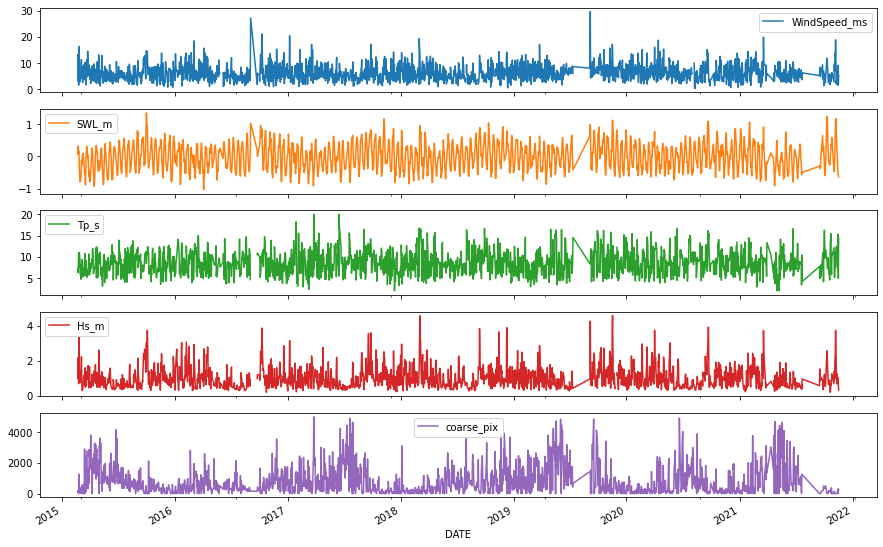

In [8]:
# take a look at the whole timeseries
ax0 = combine.plot(subplots=True, y=['WindSpeed_ms', 'SWL_m','Tp_s','Hs_m', 'coarse_pix'], figsize=(15, 10))

In [9]:
# #and make some scatter plots if you want
# ax =  combine.plot.scatter(y='coarse_pix', x='Hs_m', c='SWL_m', colormap='viridis',sharex=False)
# ax2 = combine.plot.scatter(y='coarse_pix', x='Tp_s', c='Hs_m', colormap='viridis',sharex=False)
# ax3 = combine.plot.scatter(y='coarse_pix', x='Tp_s')

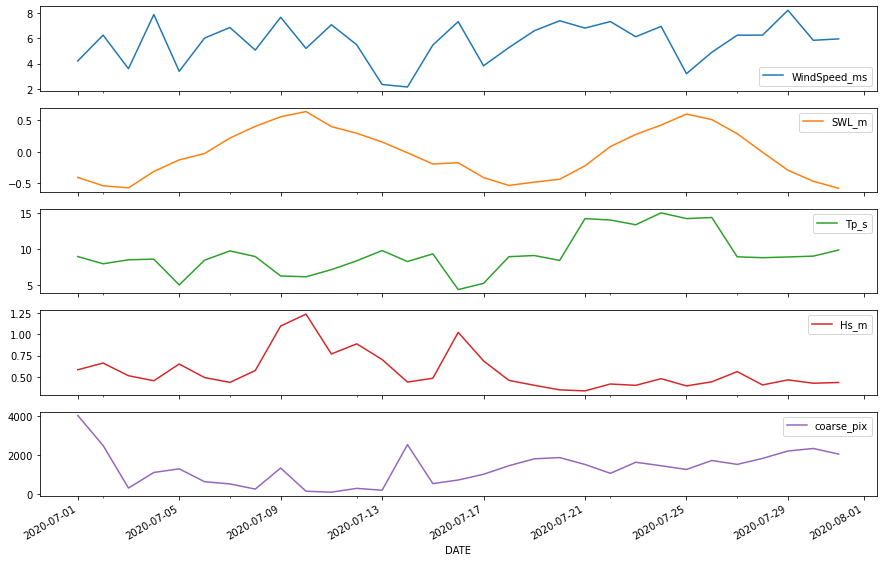

interactive(children=(Dropdown(description='ImageFile', options=('../data/overlay/FRF_c1_snap_20200630160000_o…

In [12]:
###SET THE DATERANGE OF INTEREST

dr_of_interest = '2020-07'

#a widget to look at the overlays:

#zoom the timeseries to a specific time period, such as a specific month

ax4 = combine[dr_of_interest].plot(subplots=True,y=['WindSpeed_ms', 'SWL_m','Tp_s','Hs_m', 'coarse_pix'], figsize=(15, 10))

imfiles = combine[dr_of_interest].loc[:,"overlay_path"].sort_values( ascending=True)

@interact
def show_images(ImageFile = imfiles):
    display(Image(ImageFile))